      Gene One  Gene Two  Cancer Present
0          4.3       3.9               1
1          2.5       6.3               0
2          5.7       3.9               1
3          6.1       6.2               0
4          7.4       3.4               1
...        ...       ...             ...
2995       5.0       6.5               1
2996       3.4       6.6               0
2997       2.7       6.5               0
2998       3.3       5.6               0
2999       4.6       8.2               0

[3000 rows x 3 columns]
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


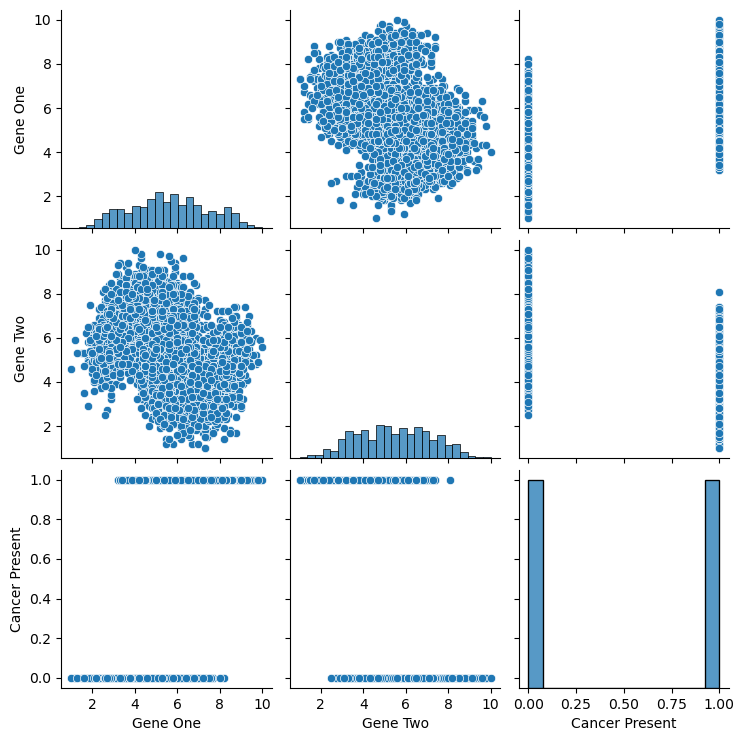

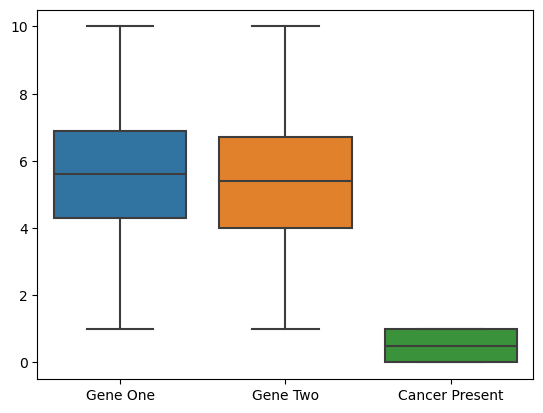

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Step-1 : Business Problem Understanding
          # The dataset is about the cancer patients. In this dataset we can observe that depending on the medical test Gene Expression one and Gene Expression two, 
          # checking is there patient has cancer or not. 

# Step-2 : Data Understanding

df = pd.read_csv("gene_expression.csv")
print(df)
print("-"*100)

print(df.info())
print("-"*100)

print(df["Gene One"].unique())
print("-"*100)
print(df["Gene Two"].unique())
print("-"*100)
print(df["Cancer Present"].unique())
print("-"*100)

print(df.value_counts())
print("-"*100)
print(df["Gene One"].value_counts())
print("-"*100)
print(df["Gene Two"].value_counts())
print("-"*100)
print(df["Cancer Present"].value_counts())
print("-"*100)

print(df.describe())
print("-"*100)

print(df.corr())
print("-"*100)

sns.pairplot(df)
plt.show()

sns.boxplot(df)
plt.show()

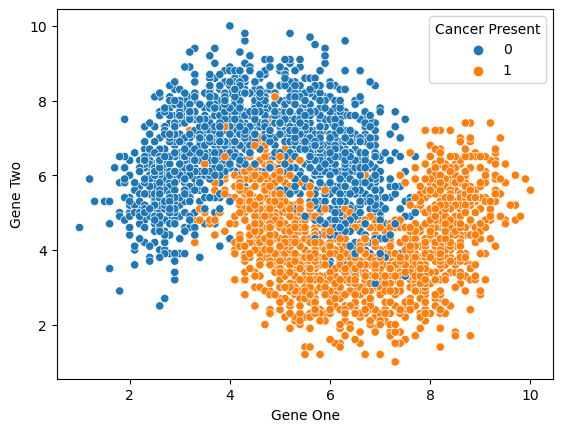

In [3]:
sns.scatterplot(x="Gene One",y="Gene Two",hue="Cancer Present",data=df)
plt.show()

In [4]:
# Step-3 : Data Preprocessing

# Data Cleaning : 

print(df.isnull().sum())
print("-"*100)

print(df.duplicated().sum())
print("-"*100)


# Data Wrandling : 

# In this dataset two input columns are continous variables and one output column is discrete categorical which is already converted into discrete count, 
# So there no need of converting them into discrete numeriacal, So no need of Data Wrangling.




Gene One          0
Gene Two          0
Cancer Present    0
dtype: int64
----------------------------------------------------------------------------------------------------
862
----------------------------------------------------------------------------------------------------


In [6]:
# Step-4 : Split the dataset into two parts as train data and test data

X = df[["Gene One","Gene Two"]]
print(X)
print("-"*100)

y = df["Cancer Present"]
print(y)
print("-"*100)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=9)
print(X_train)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()                 # Used to scaling the high magnitude columns
X_train = scaler.fit_transform(X_train)   # Scaling on the X_train data columns
X_test = scaler.transform(X_test)         # It will transform(scaling) the X_test data columns as like X_train
print(X_train)




      Gene One  Gene Two
0          4.3       3.9
1          2.5       6.3
2          5.7       3.9
3          6.1       6.2
4          7.4       3.4
...        ...       ...
2995       5.0       6.5
2996       3.4       6.6
2997       2.7       6.5
2998       3.3       5.6
2999       4.6       8.2

[3000 rows x 2 columns]
----------------------------------------------------------------------------------------------------
0       1
1       0
2       1
3       0
4       1
       ..
2995    1
2996    0
2997    0
2998    0
2999    0
Name: Cancer Present, Length: 3000, dtype: int64
----------------------------------------------------------------------------------------------------
      Gene One  Gene Two
480        7.0       3.6
2312       5.9       3.6
2256       6.8       7.6
1155       4.2       8.5
412        5.1       6.0
...        ...       ...
2104       5.5       3.8
501        5.4       8.4
2686       6.1       3.1
348        3.2       6.3
382        3.5       7.0

[2400 rows x 

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()   # creating the KNN model with default K-value & p-value
knn_model.fit(X_train,y_train)       # training the machine on training data with default K-value & p-value

KNeighborsClassifier()

In [8]:
# Step-5 : Predictions :  predictions using deafult KNN model with default K-value & p-value

ypred_train = knn_model.predict(X_train)
print(X_train)
print("-"*100)
ypred_test = knn_model.predict(X_test)
print(X_test)
print("-"*100)


[[ 0.76494099 -1.071402  ]
 [ 0.16897103 -1.071402  ]
 [ 0.65658282  1.27126038]
 ...
 [ 0.2773292  -1.3642348 ]
 [-1.29386433  0.50989511]
 [-1.13132707  0.91986103]]
----------------------------------------------------------------------------------------------------
[[ 0.33150829 -1.59850104]
 [ 0.92747825 -2.12560007]
 [-0.48117802 -0.4857364 ]
 ...
 [ 1.03583643 -1.71563416]
 [-0.48117802 -0.83713576]
 [ 0.22315012  1.79835942]]
----------------------------------------------------------------------------------------------------


In [9]:
# Evaluation : evaluation using deafult KNN model with default K-value & p-value

from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train,ypred_train)
print("train_accuracy:",train_accuracy)
test_accuracy = accuracy_score(y_test,ypred_test)
print("test_accuracy:",test_accuracy)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn_model,X,y,cv=5)
print("cross_val_score:",scores.mean())

train_accuracy: 0.9458333333333333
test_accuracy: 0.9316666666666666
cross_val_score: 0.9266666666666665


In [19]:
# Step-6 : Final Model Selection

# for best model of knn we have to findout the best K value first, 
# So, by using HyperParameter Tuning we can find best value of K.

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
estimator = KNeighborsClassifier()

grid_param = {"n_neighbors":list(range(1,12)),"p":[1,2]}       # Here, K is key of dictionary(dict) having value as the list of 1 to 31(i.e.[1,2,..,9,10,11]
                                                               # Here, p is also key of dictionary(dict) having value as the list of [1,2]

# Identifying the best value of the paramter(K) within the given range of values(i.e. here, 1 to 11) for the given data

cv_classifier = GridSearchCV(estimator,grid_param,cv=5,scoring="accuracy")   # ---> Here, cv_classifier will collect the best K value

cv_classifier.fit(X_train,y_train)        
cv_classifier.best_params_                 # ---> It will give the best K value for best model identification

{'n_neighbors': 10, 'p': 1}

In [20]:
# We have got the best K-value for best model of KNN, So we have to identify the best model by taking that K-value.
# So, We have to train the machine with best K-value again.

# Modelling : 

from sklearn.neighbors import KNeighborsClassifier
best_model = KNeighborsClassifier(n_neighbors=10,p=1)  # creating the KNN model with best identified K-value & p-value
best_model.fit(X_train,y_train)                        # training the machine on training data with best identified K-value & p-value


KNeighborsClassifier(n_neighbors=10, p=1)

In [21]:
# Predictions :

ypred_train = best_model.predict(X_train)
print(X_train)
print("-"*100)
ypred_test = best_model.predict(X_test)
print(X_test)
print("-"*100)


# Evaluation :

from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train,ypred_train)
print("train_accuracy:",train_accuracy)
test_accuracy = accuracy_score(y_test,ypred_test)
print("test_accuracy:",test_accuracy)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_model,X,y,cv=5)
print("cross_val_score:",scores.mean())

[[ 0.76494099 -1.071402  ]
 [ 0.16897103 -1.071402  ]
 [ 0.65658282  1.27126038]
 ...
 [ 0.2773292  -1.3642348 ]
 [-1.29386433  0.50989511]
 [-1.13132707  0.91986103]]
----------------------------------------------------------------------------------------------------
[[ 0.33150829 -1.59850104]
 [ 0.92747825 -2.12560007]
 [-0.48117802 -0.4857364 ]
 ...
 [ 1.03583643 -1.71563416]
 [-0.48117802 -0.83713576]
 [ 0.22315012  1.79835942]]
----------------------------------------------------------------------------------------------------
train_accuracy: 0.94125
test_accuracy: 0.925
cross_val_score: 0.9286666666666668


[[267  16]
 [ 29 288]]


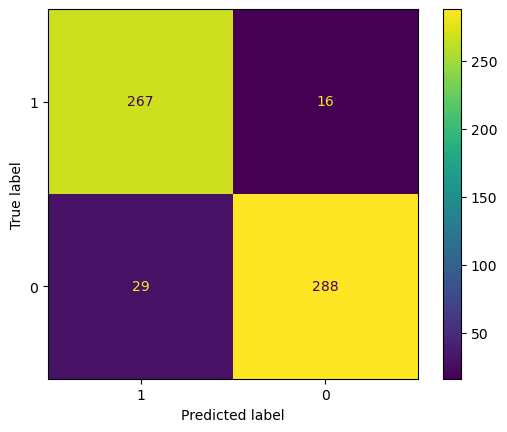

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,ypred_test)
print(confusion_matrix)

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix,display_labels=df["Cancer Present"].unique()).plot()
plt.show()

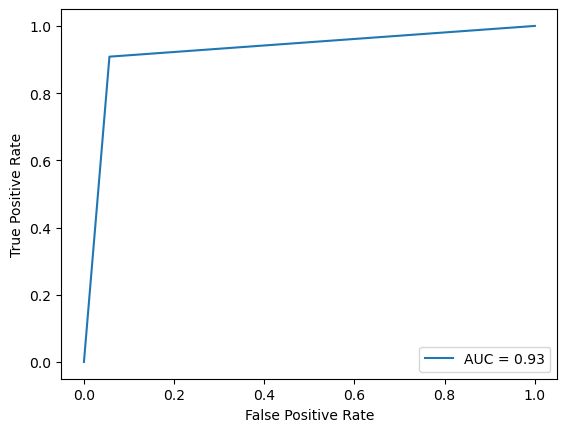

In [25]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
fpr,tpr,thresholds = roc_curve(y_test,ypred_test)
roc_auc = auc(fpr,tpr)
RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc).plot()
plt.show()

In [26]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,ypred_test)


0.9259901238421153